$\frac{\partial^2 F}{\partial t \partial s} =  -F(s) -s \partial F/\partial s$

 #version of the PDE that evolves as a function of cell number, rather than s.
 
 Cell number $n = \log_{1+c} s + \log_{1+c}[s_1]$
 
 $dn/ds = 1/(s * log 1+c)$ 
 
 $s = (1+c)^n = e^(n log 1+c)$ ; $ds/dn = log (1+c) s$ (as it should!)
 
 So, $\partial/\partial n = log (1+c) s \partial / \partial s = $ and 
 $\partial / \partial s = 1/(s log 1+c)  \partial/\partial n$
 eq is:
 $1/(s * log(1+c) \frac{\partial^2 F}{\partial t \partial n} 
 =  -F(s) - 1/log(1+c) \partial F/\partial n$
 
 or
 
 $\frac{\partial^2 F}{\partial t \partial n} =  -s log(1+c)F(s) -s\partial F/\partial n$

$\frac{\partial^2 F}{\partial t \partial s} =  -F(s) -s \partial F/\partial s$

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
Smin = 0.001
c = 0.01
ds = 0.01
S = Smin*(1+c)**np.arange(1000)
#S

In [69]:
delt_frac = 0.1
dt = delt_frac / S[-1]
ns = 100
t_max = ns * dt
T = np.arange(0,t_max,dt)

In [84]:
def updateF(F,dt):
    dlogs = 1
    log1pc = np.log(1+c)
    
    partial = np.zeros(len(F))
    rhs = np.zeros(len(F))
    
    partial[1:] = -np.diff(F)
    rhs[1:] = S[1:] * (F[1:] * log1pc * dlogs + partial[1:])
    
    rhs = rhs*(-dt)
    newF = np.zeros(len(F))
    newF[0] = 1
    for i in range(1, len(F)):
        newF[i] = rhs[i] + newF[i-1] + (F[i] - F[i-1])
    return newF

In [88]:
F = np.full([len(S)],1)
for t in T:
    newF = updateF(F,dt)
    F = newF

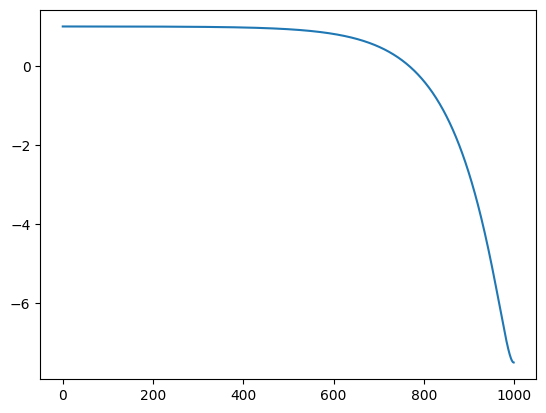

In [89]:
plt.plot(F)

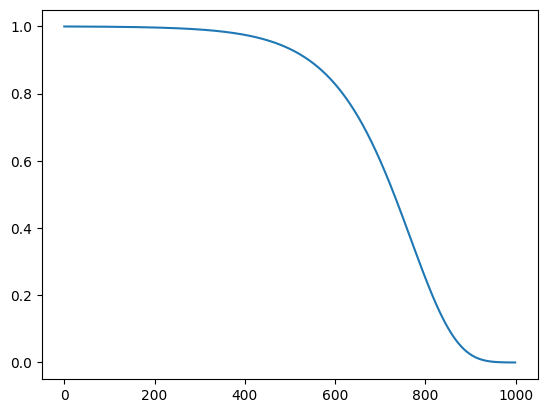

In [90]:
plt.plot(np.exp(-t_max*S))

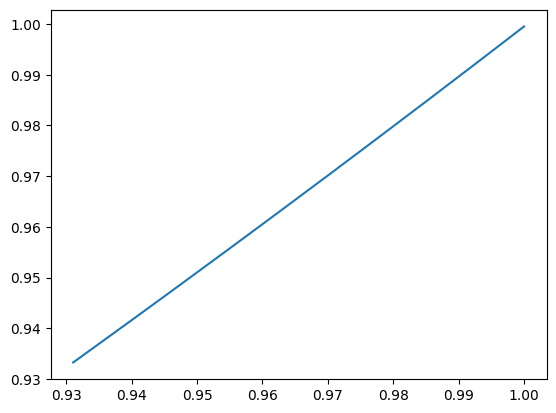

In [97]:
plt.plot(F[:500],np.exp(-t_max*S[:500]))